## 1. Gradient Descent with l2 loss, including additional polynomial features and regularization

In [191]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0,1,10)
beta_true = np.asarray([1, 1])
t_true = beta_true[0] + beta_true[1] * X

tnoisy = beta_true[0] + beta_true[1] * X + np.random.normal(0, 0.1, X.shape[0])


sgd: [1.15420081 0.79153361]
bgd: [1.15481962 0.78998578]


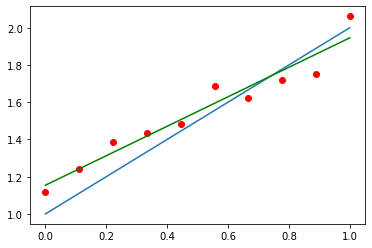

In [192]:
Xtilde = np.hstack([np.ones((len(X), 1)), X.reshape(-1, 1)])

beta_sgd = np.zeros(Xtilde.shape[1])
beta_bgd = np.zeros(Xtilde.shape[1])
ETA = .01
MAX_ITER = 1000

# SGD
for epoch in range(MAX_ITER):
    for i in range(len(Xtilde)):
        grad = 2 * (tnoisy[i] - np.dot(beta_sgd, Xtilde[i])) * (-Xtilde[i])
        beta_sgd = beta_sgd - ETA * grad
print("sgd:", beta_sgd)

# BGD
for epoch in range(MAX_ITER):
    grad = np.zeros(beta_bgd.shape)
    for i in range(len(Xtilde)):
        grad += 2 * (tnoisy[i] - np.dot(beta_bgd, Xtilde[i])) * (-Xtilde[i])
    beta_bgd = beta_bgd - ETA * grad
print("bgd:", beta_bgd)

pred = np.dot(Xtilde, beta_sgd)

plt.plot(X, t_true)
plt.scatter(X, tnoisy, c="r")
plt.plot(X, pred, c="g")
plt.show()

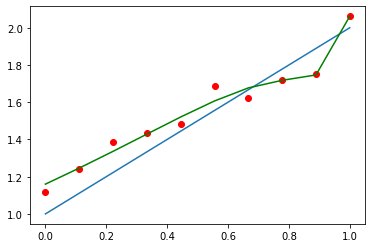

In [193]:
from sklearn.preprocessing import PolynomialFeatures

my_poly = PolynomialFeatures(20)
Xtilde = my_poly.fit_transform(X.reshape(-1, 1))

beta_sgd = np.zeros(Xtilde.shape[1])
ETA = .01
MAX_ITER = 1000

# SGD
for epoch in range(MAX_ITER):
    for i in range(len(Xtilde)):
        grad = 2 * (tnoisy[i] - np.dot(beta_sgd, Xtilde[i])) * (-Xtilde[i])
        beta_sgd = beta_sgd - ETA * grad
pred = np.dot(Xtilde, beta_sgd)

plt.plot(X, t_true)
plt.scatter(X, tnoisy, c="r")
plt.plot(X, pred, c="g")
plt.show()

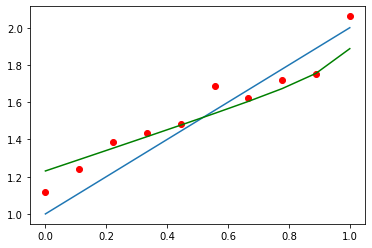

In [194]:
# Lasso

beta_sgd = np.zeros(Xtilde.shape[1])
ETA = .01
MAX_ITER = 1000
LAMBDA = .1

for epoch in range(MAX_ITER):
    for i in range(len(Xtilde)):
        grad = 2 * (tnoisy[i] - np.dot(beta_sgd, Xtilde[i])) * (-Xtilde[i]) + np.sign(beta_sgd) * LAMBDA
        beta_sgd = beta_sgd - ETA * grad
pred = np.dot(Xtilde, beta_sgd)

plt.plot(X, t_true)
plt.scatter(X, tnoisy, c="r")
plt.plot(X, pred, c="g")
plt.show()

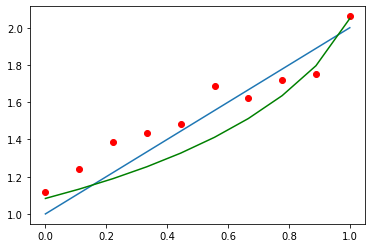

In [195]:
# Ridge
beta_sgd = np.zeros(Xtilde.shape[1])
ETA = .01
MAX_ITER = 1000
LAMBDA = .1

for epoch in range(MAX_ITER):
    for i in range(len(Xtilde)):
        grad = 2 * (tnoisy[i] - np.dot(beta_sgd, Xtilde[i])) * (-Xtilde[i]) + 2 * beta_sgd * LAMBDA
        beta_sgd = beta_sgd - ETA * grad
pred = np.dot(Xtilde, beta_sgd)

plt.plot(X, t_true)
plt.scatter(X, tnoisy, c="r")
plt.plot(X, pred, c="g")
plt.show()

In [196]:
a = np.identity(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
